### 1. Import Required Libraries

### 2. Load Your Data

```data = pd.read_csv('your_data.csv')```

### 3. Explore and Preprocess the Data

```print(data.info())  # Understand the structure of your data```

```data.fillna(method='ffill', inplace=True)  # Handle missing values```

### 4. Define Features and Target

`X = data.drop('target_column', axis=1)`

   `y = data['target_column']`

### 5. Split the Data

`X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)`

### 6. Train the Logistic Regression Model

`model = LogisticRegression()`

`model.fit(X_train, y_train)`

### 7. Make Predictions

`y_pred = model.predict(X_test)`

### 8. Evaluate the Model

`accuracy = accuracy_score(y_test, y_pred)
`

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

In [78]:
data = load_breast_cancer()
x = data.data
y = data.target

In [79]:
print(x.shape, y.shape)

(569, 30) (569,)


In [80]:
print(x)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


### Scaling

In [81]:
from sklearn.preprocessing import StandardScaler

# Scale the features to have mean 0 and variance 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)


In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# From Scratch

In [83]:
from sklearn.metrics import accuracy_score
def accuracy(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

In [91]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weight = None
        self.bias = None
        self.loss_lst = []
        
    def sigmoid(self, z):
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))

    def log_loss(self, y, y_pred):
        # epsilon = 1e-15
        # y_pred = np.clip(y_pred, epsilon, 1 - epsilon)

        # loss = np.sum(-y * np.log(y_pred+epsilon) + (1 - y) * np.log(1 - y_pred + epsilon))/len(y)

        loss = -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

        return loss

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weight = np.zeros(n_features)
        self.bias = 0
        
        for epoch in range(self.num_iterations):
            y_predicted = self.sigmoid(np.dot(X, self.weight) + self.bias)
            
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            
            self.weight -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
            if epoch % 10 == 0:
                loss = log_loss(y, y_predicted)
                self.loss_lst.append(loss)
                print(f'epoch: {epoch} epoch, loss: {loss}')
    
    def predict(self, X):
        y_predicted = self.sigmoid(np.dot(X, self.weight) + self.bias)
        class_pred = [0 if y<=0.5 else 1 for y in y_predicted]
        return class_pred
    
    def plot(self):
        plt.figure()
        plt.plot(self.loss_lst)
        plt.xlabel('Iteration')
        plt.ylabel('Loss')
        plt.title('Training Loss')
        plt.grid(True)
        plt.show()

    

### Training

epoch: 0 epoch, loss: 0.6931471805599453
epoch: 10 epoch, loss: 0.5443428616627191
epoch: 20 epoch, loss: 0.4582689238475323
epoch: 30 epoch, loss: 0.40240846537448705
epoch: 40 epoch, loss: 0.36298784679318297
epoch: 50 epoch, loss: 0.33348149163153334
epoch: 60 epoch, loss: 0.31042563120117206
epoch: 70 epoch, loss: 0.29181437663748516
epoch: 80 epoch, loss: 0.276405648217943
epoch: 90 epoch, loss: 0.26338853555204467
epoch: 100 epoch, loss: 0.2522104222077562
epoch: 110 epoch, loss: 0.2424811001484043
epoch: 120 epoch, loss: 0.23391667486651413
epoch: 130 epoch, loss: 0.22630525663784712
epoch: 140 epoch, loss: 0.21948517079553487
epoch: 150 epoch, loss: 0.21333066362860723
epoch: 160 epoch, loss: 0.20774225775996566
epoch: 170 epoch, loss: 0.20264008164070477
epoch: 180 epoch, loss: 0.19795915355294091
epoch: 190 epoch, loss: 0.19364598114974832
epoch: 200 epoch, loss: 0.18965606557682496
epoch: 210 epoch, loss: 0.1859520396884831
epoch: 220 epoch, loss: 0.18250225859442565
epoch: 

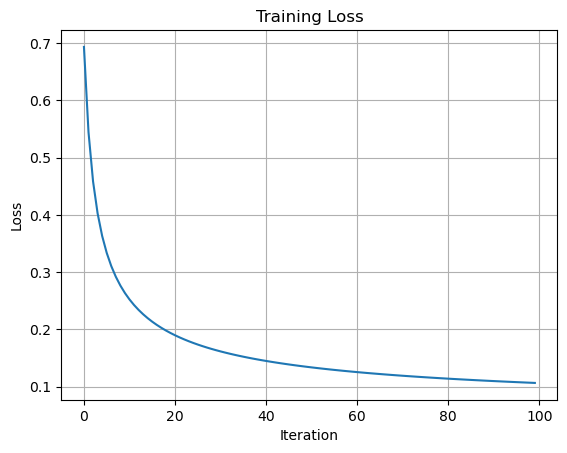

In [92]:
model = LogisticRegression(learning_rate=0.01)
model.fit(X_train, y_train)
model.plot()

### Prediction + Accuracy

In [93]:
# Train
predictions = model.predict(X_train)
train_acc = round(accuracy(predictions, y_train) * 100, 2)
print("train_acc: ", train_acc, "%")

# Test
predictions = model.predict(X_test)
test_acc = round(accuracy(predictions, y_test) * 100, 2)
print("test_acc: ", test_acc, "%")

train_acc:  98.24 %
test_acc:  99.12 %


# Using Sklearn

In [90]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
acc = round(accuracy(predictions, y_test) * 100, 2)
print(acc, "%")

97.37 %
